# LIBRA and the Liquid Immersion Blanket
## 1L BABY
- Wall permeation
- FLiBe handing (ClLiF)
- Wall materials
- Tritium probe 

In [1]:
import openmc
import matplotlib.pyplot as plt

from run_model import model, salt_vol

isotopes ['Al27', 'Ar36', 'Ar38', 'Ar40', 'B10', 'B11', 'Be9', 'C12', 'C13', 'Ca40', 'Ca42', 'Ca43', 'Ca44', 'Ca46', 'Ca48', 'Co59', 'Cr50', 'Cr52', 'Cr53', 'Cr54', 'F19', 'Fe54', 'Fe56', 'Fe57', 'Fe58', 'H1', 'H2', 'K39', 'K40', 'K41', 'Li6', 'Li7', 'Mg24', 'Mg25', 'Mg26', 'Mn55', 'Mo100', 'Mo92', 'Mo94', 'Mo95', 'Mo96', 'Mo97', 'Mo98', 'N14', 'N15', 'Na23', 'Nb93', 'Ni58', 'Ni60', 'Ni61', 'Ni62', 'Ni64', 'O16', 'O17', 'O18', 'P31', 'Pb204', 'Pb206', 'Pb207', 'Pb208', 'S32', 'S33', 'S34', 'S36', 'Si28', 'Si29', 'Si30', 'Ti46', 'Ti47', 'Ti48', 'Ti49', 'Ti50', 'W180', 'W182', 'W183', 'W184', 'W186', 'Zr90', 'Zr91', 'Zr92', 'Zr94', 'Zr96']
Searching libraries with the following priority {'ENDFB-8.0-NNDC': 1}
Isotopes found matching library requirements 556
Isotopes found matching particle requirements 1789
Isotopes found matching isotope requirements 325
Isotopes found matching all requirements 82
             library remote_file  \
1233  ENDFB-8.0-NNDC       H1.h5   
1234  ENDFB-8.0-NND

In [2]:
sp = openmc.StatePoint("statepoint.100.h5")
tbr = sp.get_tally(name="tritium tally").get_pandas_dataframe()
print(f"tritium tally: {tbr['mean'].iloc[0] :.6e}\n")
print(f"tritium tally std. dev.: {tbr['std. dev.'].iloc[0] :.6e}\n")

tritium tally: 1.045105e+00

tritium tally std. dev.: 3.575437e-04



In [18]:
from single_wall_model import flibe_nat
cm3_to_m3 = 1e-6
g_to_t = 1e-6
print(f"Salt volume: \n{salt_vol:.2e} cm^3\n{salt_vol * cm3_to_m3:.2f} m^3\n")
print(f"Salt mass: \n{salt_vol * flibe_nat.density:.2e} g\n{salt_vol * flibe_nat.density * g_to_t:.2f} tons\n")


Salt volume: 
2.66e+06 cm^3
2.66 m^3

Salt mass: 
5.16e+06 g
5.16 tons



In [4]:
tbr_mesh_tally = sp.get_tally(name="(n,Xt) tally mesh")
assert isinstance(tbr_mesh_tally, openmc.Tally), "Tally not found"
tbr_mesh = tbr_mesh_tally.get_pandas_dataframe()
tbr_mesh

mesh 1         nuclide   score     mean std. dev.
            x   y   z                                   
0           1   1   1   total  (n,Xt) 3.23e-07  2.51e-08
1           2   1   1   total  (n,Xt) 3.75e-07  3.14e-08
2           3   1   1   total  (n,Xt) 3.89e-07  3.08e-08
3           4   1   1   total  (n,Xt) 3.79e-07  3.32e-08
4           5   1   1   total  (n,Xt) 4.00e-07  3.46e-08
...       ...  ..  ..     ...     ...      ...       ...
970294     95  99  99   total  (n,Xt) 3.95e-08  1.03e-08
970295     96  99  99   total  (n,Xt) 4.01e-08  1.11e-08
970296     97  99  99   total  (n,Xt) 4.10e-08  1.16e-08
970297     98  99  99   total  (n,Xt) 3.48e-08  9.45e-09
970298     99  99  99   total  (n,Xt) 3.27e-08  9.76e-09

[970299 rows x 7 columns]

In [5]:
mesh = tbr_mesh_tally.filters[0].mesh
assert isinstance(mesh, openmc.CylindricalMesh)
mesh.r_grid

array([12.065     , 12.77207071, 13.47914141, 14.18621212, 14.89328283,
       15.60035354, 16.30742424, 17.01449495, 17.72156566, 18.42863636,
       19.13570707, 19.84277778, 20.54984848, 21.25691919, 21.9639899 ,
       22.67106061, 23.37813131, 24.08520202, 24.79227273, 25.49934343,
       26.20641414, 26.91348485, 27.62055556, 28.32762626, 29.03469697,
       29.74176768, 30.44883838, 31.15590909, 31.8629798 , 32.57005051,
       33.27712121, 33.98419192, 34.69126263, 35.39833333, 36.10540404,
       36.81247475, 37.51954545, 38.22661616, 38.93368687, 39.64075758,
       40.34782828, 41.05489899, 41.7619697 , 42.4690404 , 43.17611111,
       43.88318182, 44.59025253, 45.29732323, 46.00439394, 46.71146465,
       47.41853535, 48.12560606, 48.83267677, 49.53974747, 50.24681818,
       50.95388889, 51.6609596 , 52.3680303 , 53.07510101, 53.78217172,
       54.48924242, 55.19631313, 55.90338384, 56.61045455, 57.31752525,
       58.02459596, 58.73166667, 59.43873737, 60.14580808, 60.85

In [6]:
mesh.write_data_to_vtk("out.vtk", {"mean": tbr_mesh_tally.mean})

/home/remidm/anaconda3/envs/libra-one-env/lib/python3.12/site-packages/openmc/mesh.py:1877: UserWarning: Cartesian coordinates are returned from this property as of version 0.14.0
  warnings.warn('Cartesian coordinates are returned from this property as of version 0.14.0')


<vtkmodules.vtkCommonDataModel.vtkStructuredGrid(0x563b54cade30) at 0x7f089bec3160>

### Geometry

In [7]:
geometry = model.geometry

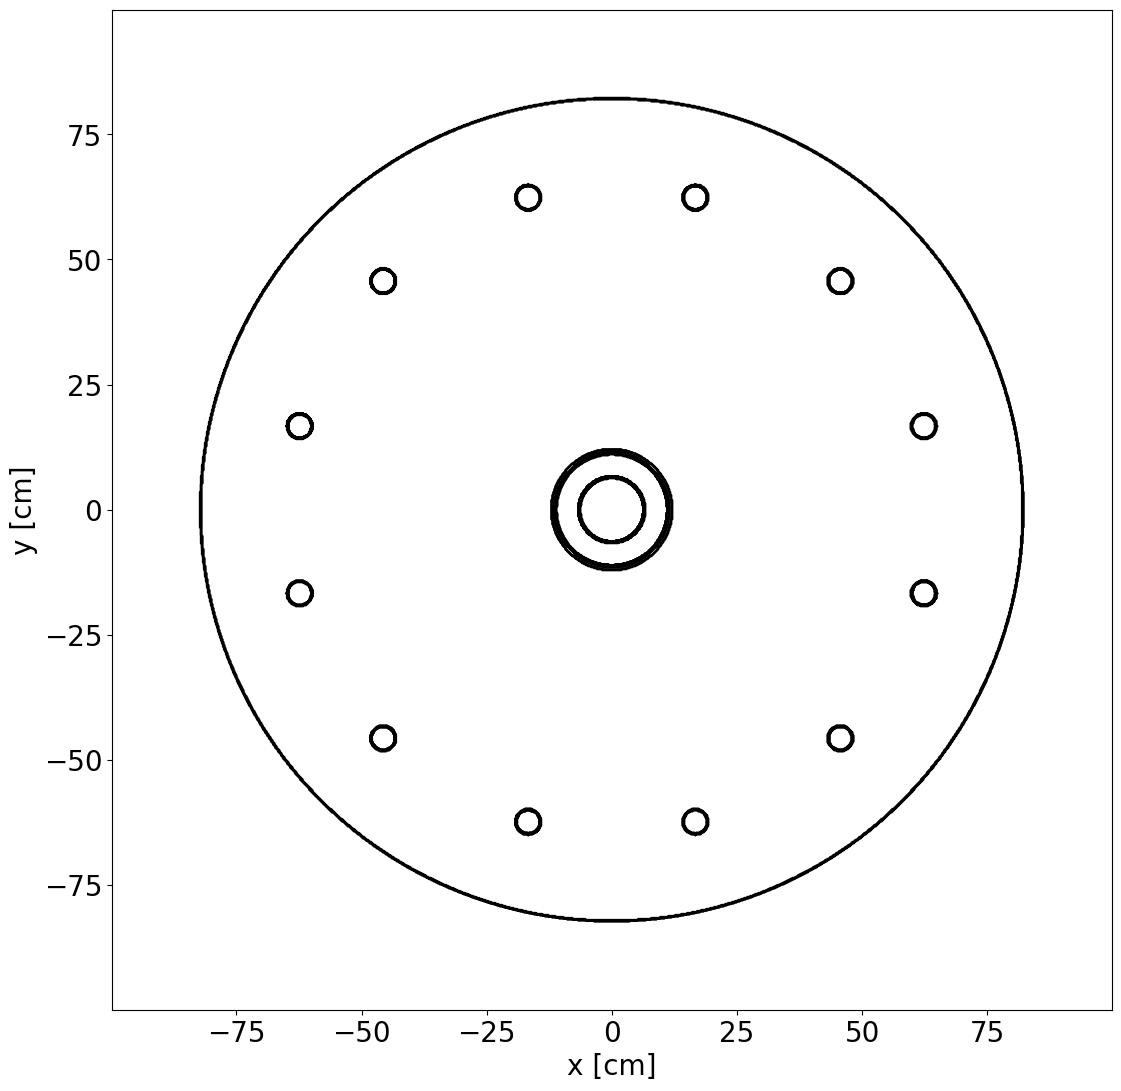

In [8]:
# Visualization
x_c = 0
y_c = 0
z_c = 30
ax = geometry.plot(
    width=(200, 200),
    origin=(x_c, y_c, z_c + 10),
    pixels=(1000, 1000),
    basis="xy",
    outline="only",
)

ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()

/tmp/ipykernel_1537582/2706741847.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


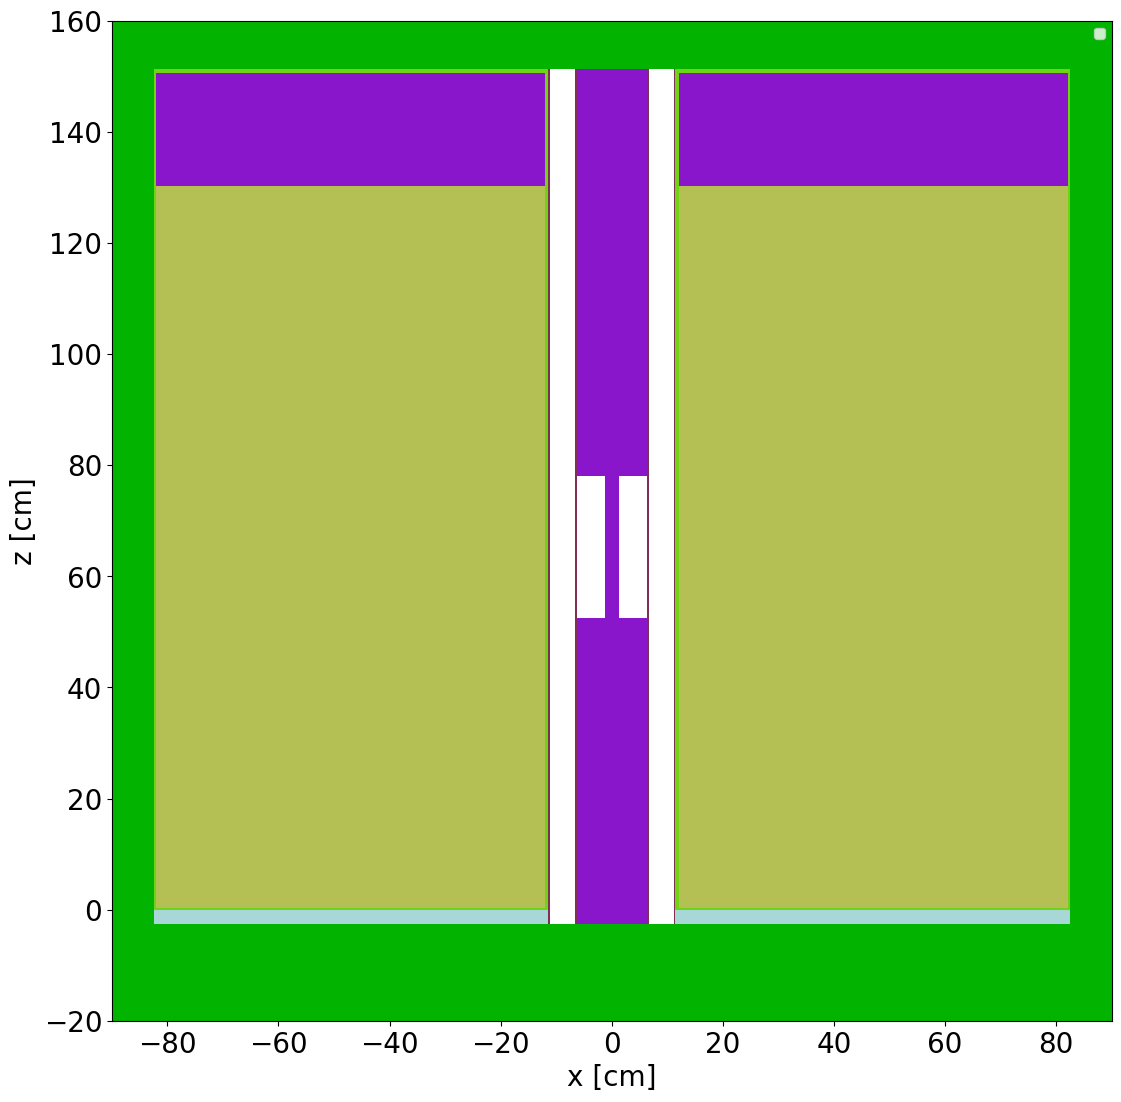

In [9]:
ax = geometry.plot(
    width=(180, 180),
    origin=(x_c, y_c, z_c+40),
    pixels=(1000, 1000),
    basis="xz",
    color_by="material",
    # colors={Air: "white", air: "white"},
)
plt.legend()
ax.tick_params(axis="both", labelsize=20)
ax.set_xlabel(ax.get_xlabel(), fontsize=20)
ax.set_ylabel(ax.get_ylabel(), fontsize=20)
plt.show()